<b>Aim</b>:To perform data preprocessing, split the data into training and testing sets, visualize data using scatter plot , train and test the model by applying Simple Linear Regression,Gradient Descent,Lasso,Ridge,ElasticNet,Polynomial Regression and finally evaluate the model using various metrics.


**Description:**<br>
**Simple Linear Regression**:

Description: Simple linear regression is a statistical method used to model the relationship between a single independent variable (predictor) and a dependent variable (outcome). It assumes a linear relationship between the variables and seeks to find the best-fitting line that minimizes the sum of squared differences between the observed and predicted values.<br>
Formula: y = β0 +β1x<br>
is the formula used for simple linear regression. y is the predicted value of the dependent variable (y) for any given value of the independent variable (x). B0 is the intercept, the predicted value of y when the x is 0. B1 is the regression coefficient – how much we expect y to change as x increases.
The equation of a simple linear regression model is represented as:

**Gradient Descent:**
Description: Gradient descent is an optimization algorithm used to minimize the loss function in machine learning models. It iteratively adjusts the model parameters (coefficients) in the direction of the steepest descent of the loss function gradient until convergence is achieved.<br>

Formula to update params: w = w - alpha(derivate(cost))

**Lasso Regression (L1 Regularization)**:

Description: Lasso regression is a linear regression technique that incorporates L1 regularization to penalize large coefficients and encourage sparsity in the model. It adds the absolute value of the coefficients to the loss function, which helps in feature selection by shrinking some coefficients to zero.<br>
formula:Minimization objective = LS Obj + α \* (sum of the absolute value of coefficients)<br>
**Ridge Regression (L2 Regularization)**:

Description: Ridge regression is a linear regression technique that incorporates L2 regularization to penalize large coefficients and reduce overfitting. It adds the squared magnitude of the coefficients to the loss function, which shrinks the coefficients towards zero without eliminating them entirely.<br>
The Ridge regression objective function is given by:
Minimization objective = LS Obj + α \* (sum of square of coefficients)<br>
**ElasticNet Regression**:

Description: ElasticNet regression is a linear regression technique that combines both L1 and L2 regularization to address the limitations of Lasso and Ridge regression. It balances between sparsity and smoothness, making it suitable for datasets with high-dimensional features and multicollinearity.<br>
Formula:
The ElasticNet regression objective function is combination of ridge and lasso.
Minimization objective = LS Obj + α _ (sum of square of coefficients)+α _ (sum of the absolute value of coefficients)<Br>
**Polynomial Regression:**

Description: Polynomial regression is a form of linear regression that models the relationship between the independent variable and the dependent variable as an nth-degree polynomial. It allows for more complex, nonlinear relationships to be captured in the data.<br>
Formula:
The equation of a polynomial regression model is represented as:y=f(x)=β0+β1x+β2x2+β3x3+…

**Evaluation Metrics:**<br>
**Mean Squared Error:**Mean Squared Error measures the average squared difference between the actual values and the predicted values by the regression model. It penalizes larger errors more heavily than smaller ones.<br>
MSE = 1/nΣ(yi − pi)^2, where yi is the ith observed value, pi is the corresponding predicted value for yi, and n is the number of observations. The Σ indicates that a summation is performed over all values of i.

**R-squared (R2) Score:**
R-squared, or the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model. It ranges from 0 to 1, where 1 indicates a perfect fit.
R^2 = 1 - SSres/SStot
where
SSres is the sum of squared residuals (errors) of the model.
SStot is the total sum of squares, which measures the total variance in the dependent variable.<br>

<hr><br>
<b>Cross-Validation:</b>
Cross-validation is a resampling technique used to evaluate machine learning models on a limited dataset. It helps to assess how well a model generalizes to new data by partitioning the dataset into multiple subsets, called folds. The model is trained on a subset of the data (training set) and evaluated on the remaining data (validation set). This process is repeated multiple times, with different subsets used for training and validation each time. The most common type of cross-validation is k-fold cross-validation, where the dataset is divided into k equal-sized folds.<br>
<b>GridSearchCV</b>
GridSearchCV is a technique used for hyperparameter tuning in machine learning models. It is an exhaustive search algorithm that systematically evaluates a specified set of hyperparameters for a given model to determine the combination that yields the best performance. GridSearchCV works by creating a grid of all possible hyperparameter values and evaluating the model's performance using cross-validation on each combination of hyperparameters. It then selects the combination of hyperparameters that produces the best performance based on a specified evaluation metric (e.g., accuracy, F1 score).


In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('computer_hardware_dataset.csv')

**Understanding the data:**

<hr>


In [ ]:
#how big is the data?
df.shape

(209, 10)

In [ ]:
#how does the data look like?
# df.head()
df.sample(5) # used to print any random columns

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
56,dg,eclipse:mv/8000-ii,220,1000,8000,16,1,2,71,42
21,burroughs,b5920,143,3100,6200,0,5,20,33,39
172,nixdorf,8890/70,200,2000,8000,64,1,5,41,67
107,ibm,4321,900,1000,1000,0,1,2,11,18
37,cdc,omega:480-ii,50,1000,4000,8,1,5,29,29


In [ ]:
#what is the datatype of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
#are there any missing values?
df.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [ ]:
#mathematical description
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
#any duplicate values?
df.duplicated().sum()# returns how many pairs of duplicates exist

0

In [ ]:
#correlation between cols
# df.corr()
t=df.select_dtypes(include='object').columns # to remove any categorical values from our dataset

df_m = df.drop(columns=t)
# print(df.head())

df_m.corr()['ERP']

MYCT    -0.288396
MMIN     0.819292
MMAX     0.901202
CACH     0.648620
CHMIN    0.610580
CHMAX    0.592156
PRP      0.966472
ERP      1.000000
Name: ERP, dtype: float64

<hr><hr>
<b>Handling Outliers:</b>
<hr>
identifying outliers using boxplot for age.
<br>
<b>Detection using IQR method</b>:In this method, we calculate the IQR, which is the difference between the 75th and 25th percentiles of the data. We consider any data points that lie over 1.5 times the IQR below the 25th percentile or above the 75th percentile as outliers and we can remove or correct them.
<br>
<b>Handling using winsorization:</b> Winsorization is a method that replaces extreme values with less extreme values. In this method, we replace the extreme values with the maximum or minimum values of the dataset


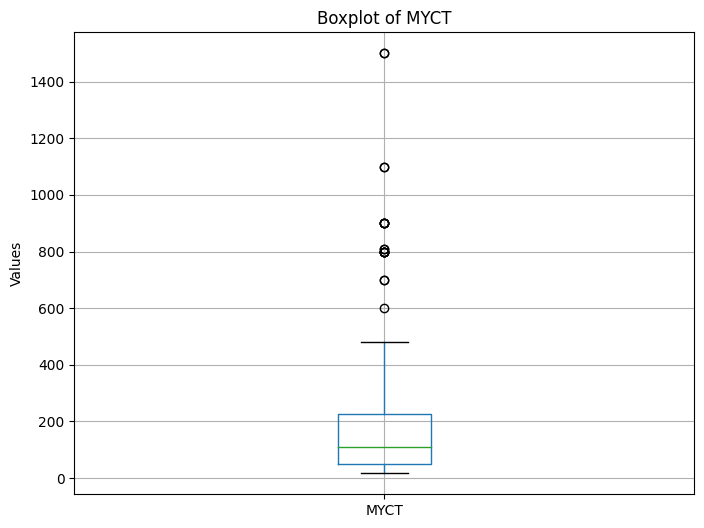

no.of outliers 20


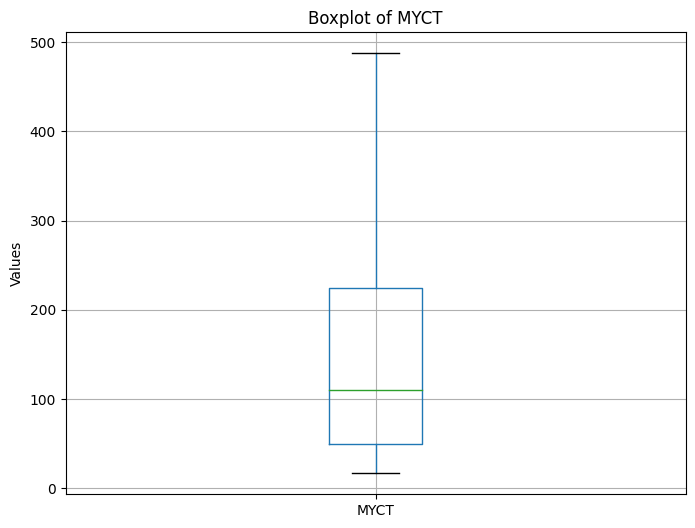

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_outliers(df, column):
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.title('Boxplot of ' + column)
    plt.ylabel('Values')
    plt.show()

visualize_outliers(df, 'MYCT')

# Calculate the first and third quartiles
Q1 = df['MYCT'].quantile(0.25)
Q3 = df['MYCT'].quantile(0.75)

    # Calculate the interquartile range (IQR)
IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
outliers = df[(df['MYCT'] < lower_bound) | (df['MYCT'] > upper_bound)]
print("no.of outliers",len(outliers))
  #handle outliers
df['MYCT'] = df['MYCT'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
visualize_outliers(df,'MYCT')


<hr><hr>


**Data Visualization and Analysis:**

<hr>


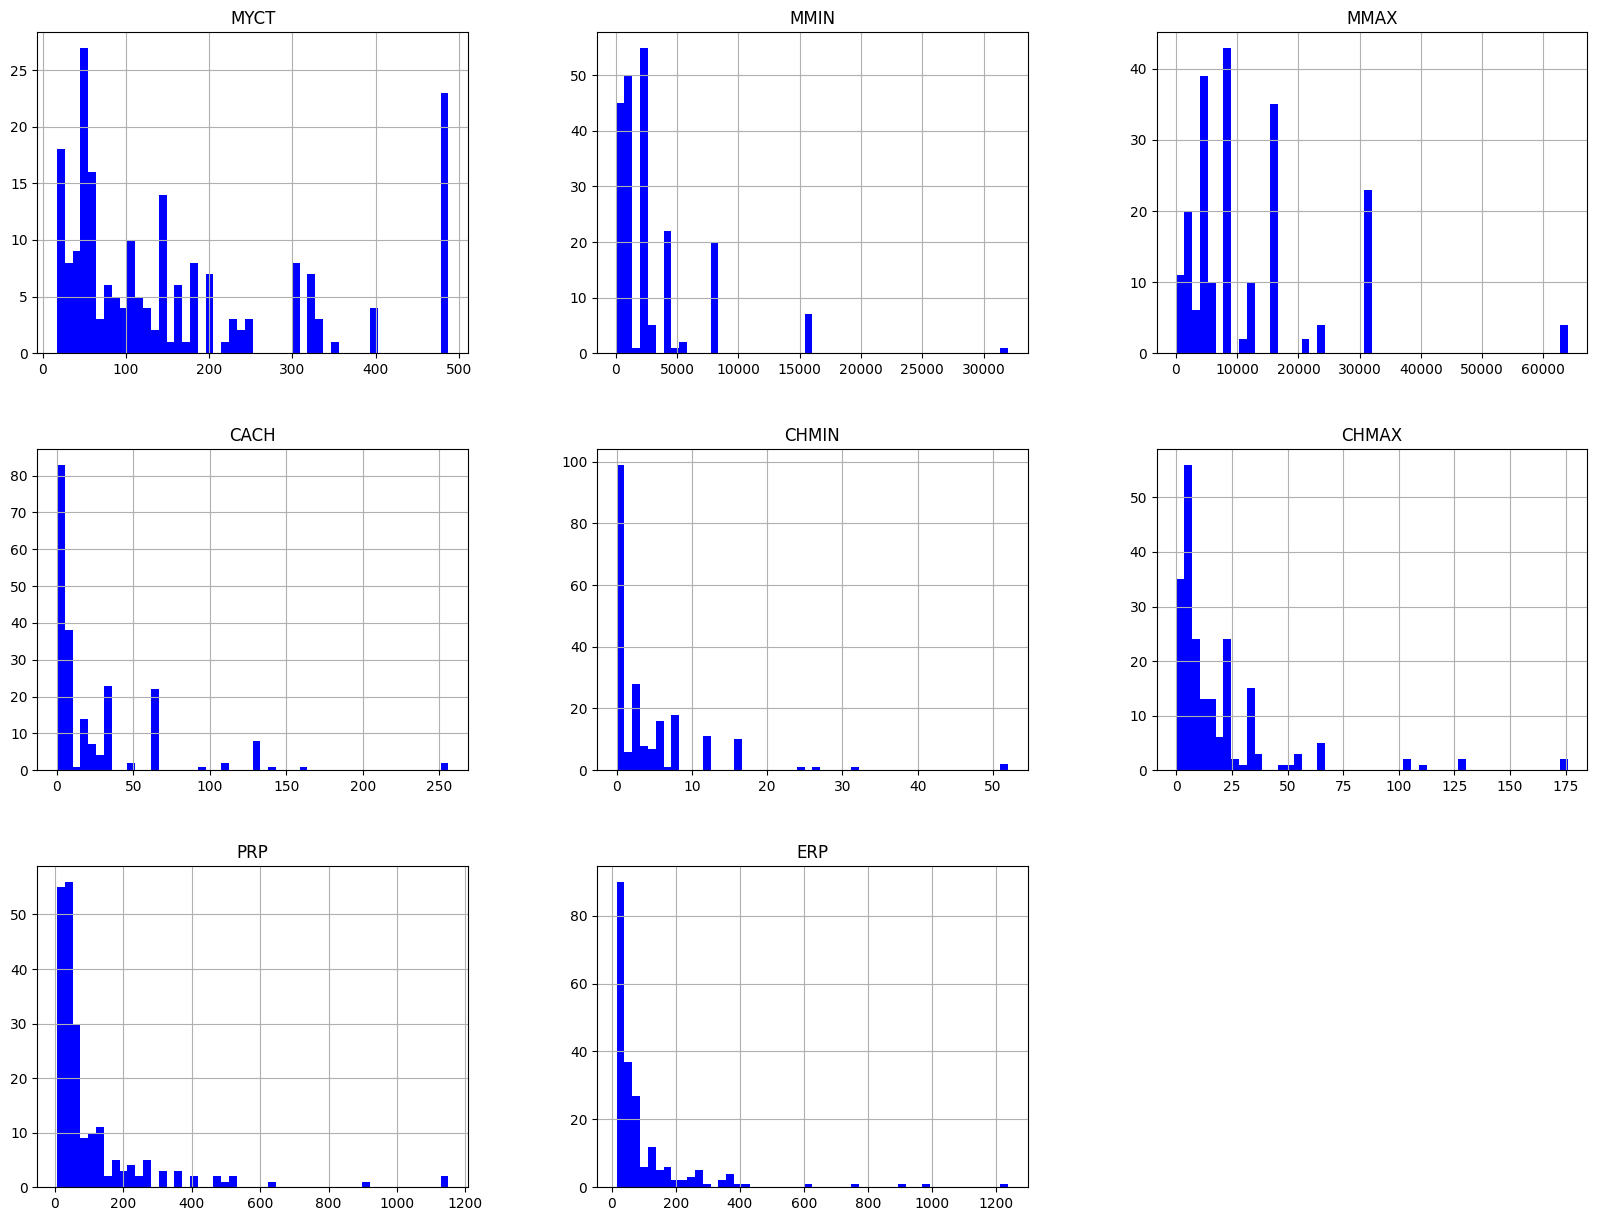

In [ ]:
#univariate
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

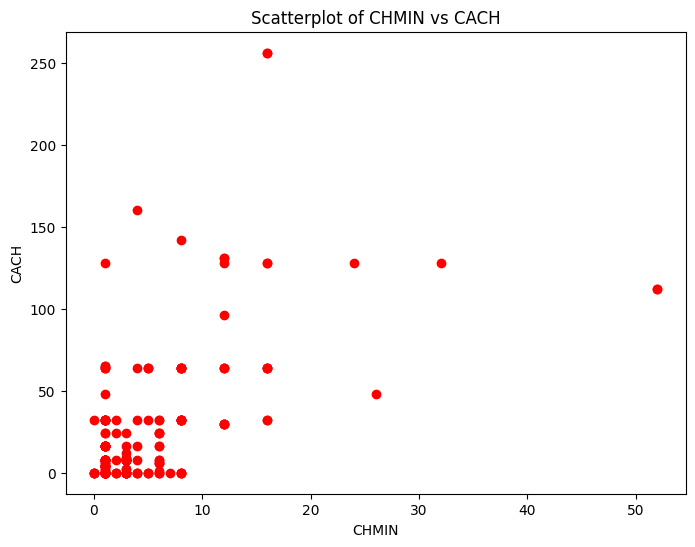

In [ ]:
#mulitvariate
cach = df['CHMIN']
erp = df['CACH']

# Plot the scatterlot
plt.figure(figsize=(8, 6))
plt.scatter(cach, erp, color='red')  # 'alpha' controls the transparency of points
plt.title('Scatterplot of CHMIN vs CACH')
plt.xlabel('CHMIN')
plt.ylabel('CACH')
# plt.grid(True)
plt.show()

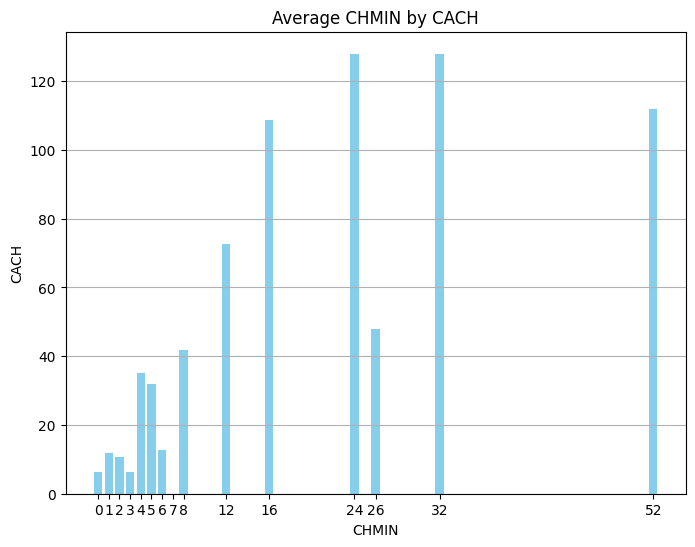

  vendor_name model_name   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser      32/60  125.0   256   6000   256     16    128  198  199
1      amdahl     470v/7   29.0  8000  32000    32      8     32  269  253
2      amdahl    470v/7a   29.0  8000  32000    32      8     32  220  253
3      amdahl    470v/7b   29.0  8000  32000    32      8     32  172  253
4      amdahl    470v/7c   29.0  8000  16000    32      8     16  132  132


In [ ]:
avg_erp_by_cach = df.groupby('CHMIN')['CACH'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(avg_erp_by_cach['CHMIN'], avg_erp_by_cach['CACH'], color='skyblue')
plt.title('Average CHMIN by CACH')
plt.xlabel('CHMIN')
plt.ylabel('CACH')
plt.xticks(avg_erp_by_cach['CHMIN'])
plt.grid(axis='y')
plt.show()
print(df.head())

**Converting Categorical to Numerical:**

<hr>


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# List of nominal columns to be one-hot encoded
nominal_columns = ['vendor_name','model_name'] # these 2 are the categorical in thee given dataset

# Extract the nominal columns from the DataFrame
nominal_data = df[nominal_columns]

# Initialize OneHotEncoder with specified prefix
encoder = OneHotEncoder(sparse=False, drop='first', categories='auto')

# Fit and transform the nominal data using OneHotEncoder
encoded_data = encoder.fit_transform(nominal_data)

# Convert the encoded data into a DataFrame with column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nominal_columns))
encoded_df = encoded_df.astype(int)
# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=nominal_columns), encoded_df], axis=1)

# Display the DataFrame with one-hot encoding
print("DataFrame with one-hot encoding:")
print(df_encoded.info())
print(df_encoded.head())
print(df.info())

DataFrame with one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Columns: 245 entries, MYCT to model_name_vs-90
dtypes: float64(1), int64(244)
memory usage: 400.2 KB
None
    MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP  vendor_name_amdahl  \
0  125.0   256   6000   256     16    128  198  199                   0   
1   29.0  8000  32000    32      8     32  269  253                   1   
2   29.0  8000  32000    32      8     32  220  253                   1   
3   29.0  8000  32000    32      8     32  172  253                   1   
4   29.0  8000  16000    32      8     16  132  132                   1   

   vendor_name_apollo  ...  model_name_v8635  model_name_v8650  \
0                   0  ...                 0                 0   
1                   0  ...                 0                 0   
2                   0  ...                 0                 0   
3                   0  ...                 0                 0   
4       

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<hr>
<hr>


**Feature Engineering:**

<hr>


we check


In [ ]:
df_encoded.corr()['ERP'].sort_values(ascending=False)

ERP                   1.000000
PRP                   0.966472
MMAX                  0.901202
MMIN                  0.819292
CACH                  0.648620
                        ...   
vendor_name_ibm      -0.075872
vendor_name_harris   -0.077051
vendor_name_hp       -0.081874
vendor_name_c.r.d    -0.082030
MYCT                 -0.378280
Name: ERP, Length: 245, dtype: float64

In [ ]:
dff = df_encoded

X = dff.iloc[:, 0:7].join(dff.iloc[:, 7:20])  # Joining columns from index 0 to 7 and from index 7 to 20
y = dff.iloc[:, 7]   # Extract column at index 7
print(y.info())
print(X.info())

<class 'pandas.core.series.Series'>
RangeIndex: 209 entries, 0 to 208
Series name: ERP
Non-Null Count  Dtype
--------------  -----
209 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MYCT                    209 non-null    float64
 1   MMIN                    209 non-null    int64  
 2   MMAX                    209 non-null    int64  
 3   CACH                    209 non-null    int64  
 4   CHMIN                   209 non-null    int64  
 5   CHMAX                   209 non-null    int64  
 6   PRP                     209 non-null    int64  
 7   ERP                     209 non-null    int64  
 8   vendor_name_amdahl      209 non-null    int64  
 9   vendor_name_apollo      209 non-null    int64  
 10  vendor_name_basf        209 non-null    int64  
 11  vendo

In [ ]:
#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,MYCT,1.986393e+04
1,MMIN,1.073485e+06
2,MMAX,2.412916e+06
3,CACH,1.332885e+04
4,CHMIN,1.944447e+03
5,CHMAX,6.752382e+03
6,PRP,5.054715e+04
7,ERP,5.015144e+04
8,vendor_name_amdahl,2.000000e+02
9,vendor_name_apollo,3.382857e+01


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print best features

                    Specs         Score
2                    MMAX  2.412916e+06
1                    MMIN  1.073485e+06
6                     PRP  5.054715e+04
7                     ERP  5.015144e+04
0                    MYCT  1.986393e+04
3                    CACH  1.332885e+04
5                   CHMAX  6.752382e+03
4                   CHMIN  1.944447e+03
8      vendor_name_amdahl  2.000000e+02
18  vendor_name_formation  1.691667e+02


considering above best 20 features and dropping off remaining columns for our training.


In [ ]:

columns = [
    'MMAX',
    'MMIN',
    'PRP',
    'ERP',
    'MYCT',
    'CACH',
    'CHMAX',
    'CHMIN',
    'vendor_name_amdahl',
    'vendor_name_formation'
]

dff_new = dff[columns]

In [ ]:
dff_new.shape
print(dff_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMAX                   209 non-null    int64  
 1   MMIN                   209 non-null    int64  
 2   PRP                    209 non-null    int64  
 3   ERP                    209 non-null    int64  
 4   MYCT                   209 non-null    float64
 5   CACH                   209 non-null    int64  
 6   CHMAX                  209 non-null    int64  
 7   CHMIN                  209 non-null    int64  
 8   vendor_name_amdahl     209 non-null    int64  
 9   vendor_name_formation  209 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 16.5 KB
None


<hr>
<hr>


**Training and model evaluation:**

<hr>


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
# some = df_encoded
Y = dff_new['ERP']
X = dff_new.drop('ERP',axis=1)
# X = dff
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 179 to 3
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMAX                   188 non-null    int64  
 1   MMIN                   188 non-null    int64  
 2   PRP                    188 non-null    int64  
 3   MYCT                   188 non-null    float64
 4   CACH                   188 non-null    int64  
 5   CHMAX                  188 non-null    int64  
 6   CHMIN                  188 non-null    int64  
 7   vendor_name_amdahl     188 non-null    int64  
 8   vendor_name_formation  188 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 14.7 KB


In [ ]:
# simple linear regression
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=lm.predict(X_test)

In [ ]:
!pip install scikit-learn

In [ ]:
# Install the scikit-learn library
!pip install scikit-learn

# Import the necessary modules
from sklearn import metrics
import numpy as np

# Calculate the mean squared error
simp_mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error:", simp_mse)

# Calculate the root mean squared error
simp_rmse = np.sqrt(simp_mse)
print("Root mean squared error:", simp_rmse)

# Calculate the r-squared score
simp_rscore = metrics.r2_score(Y_test, Y_pred)
print("R-squared score:", simp_rscore)

Mean squared error: 1288.7002955734497
Root mean squared error: 35.89847205067995
R-squared score: 0.9683792464975952


In [ ]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score
kcv = linear_model.LinearRegression()
scores = cross_val_score(kcv, X_train, Y_train, scoring='r2', cv=8)
scores

array([0.91489943, 0.90918744, 0.9267212 , 0.91322274, 0.95350443,
       0.76993694, 0.9606137 , 0.86164725])

In [ ]:
#Ridge regression
import sklearn
from sklearn.linear_model import Ridge
rid=linear_model.Ridge(alpha=0.1)
rid.fit(X_train,Y_train)
Y_predict=rid.predict(X_test)
rid_mse = sklearn.metrics.mean_squared_error(Y_test, Y_predict)
print("mean squared error:",rid_mse)
rid_rmse=np.sqrt(rid_mse)
print("root mean squared error:",rid_rmse)
rid_rscore = sklearn.metrics.r2_score(Y_test,Y_predict)
print("r-square score:",rid_rscore)

mean squared error: 1287.2768461045564
root mean squared error: 35.878640527541684
r-square score: 0.9684141735826076


In [ ]:
rid.score(X_test,Y_test)

0.9684141735826076

In [ ]:
#gridsearchcv for finding optimal alpha for ridge regression
from sklearn.model_selection import GridSearchCV
par={'alpha':[0.1,0.3,0.5,0.7,0.9,0.001,0.003,0.005,0.007,0.009,0.01,0.03,0.05,0.07,0.09]}
ridge = Ridge()
gr1_mse = GridSearchCV(estimator = ridge,param_grid = par,scoring="neg_mean_squared_error", cv=7)
gr1_mse.fit(X,Y)
print(gr1_mse.best_params_)
print(gr1_mse.best_score_)

{'alpha': 0.9}
-2081.3731905277386


In [ ]:
#after updating alpha value
from sklearn.linear_model import Ridge
rid=linear_model.Ridge(alpha=0.07)
rid.fit(X_train,Y_train)
Y_predict=rid.predict(X_test)
rid_mse = sklearn.metrics.mean_squared_error(Y_test, Y_predict)
print("mean squared error:",rid_mse)
rid_rmse=np.sqrt(rid_mse)
print("root mean squared error:",rid_rmse)
rid_rscore = sklearn.metrics.r2_score(Y_test,Y_predict)
print("r-square score:",rid_rscore)

mean squared error: 1287.6948158853932
root mean squared error: 35.884464826515014
r-square score: 0.9684039178858745


In [ ]:
#lasso regression
from sklearn.linear_model import Lasso
las=linear_model.Lasso(alpha=0.01)
las.fit(X_train,Y_train)
Y_predict=rid.predict(X_test)
#print(las.coef_)

las_mse = sklearn.metrics.mean_squared_error(Y_test, Y_predict)
print("mean squared error:",las_mse)
las_rmse = np.sqrt(las_mse)
print("root mean squared error:",las_rmse)
las_rscore = las.score(X_test,Y_test)
print("r-square score:",las_rscore)

mean squared error: 1287.6948158853932
root mean squared error: 35.884464826515014
r-square score: 0.9684112507055049


In [ ]:
#grid search for lasso regression alpha
from sklearn.model_selection import GridSearchCV
par={'alpha':[0.1,0.3,0.5,0.7,0.9,0.001,0.003,0.005,0.007,0.009,0.01,0.03,0.05,0.07,0.09]}
lasso = Lasso()
gr2_mse = GridSearchCV(estimator = lasso,param_grid = par,scoring="neg_mean_squared_error", cv=7)
gr2_mse.fit(X,Y)
print(gr2_mse.best_params_)
print(gr2_mse.best_score_)

{'alpha': 0.9}
-1975.6132212564773


In [ ]:
#Gradient Descent before gridsearch for learning rate
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(learning_rate=0.01)
gb.fit(X_train,Y_train)
Y_predict=gb.predict(X_test)

gd_mse = sklearn.metrics.mean_squared_error(Y_test, Y_predict)
print("mean squared error:",gd_mse)
gd_rmse = np.sqrt(gd_mse)
print("root mean squared error:",gd_rmse)

gd_rscore = sklearn.metrics.r2_score(Y_test,Y_predict)
print("r-square score:",gd_rscore)

mean squared error: 4241.879147216386
root mean squared error: 65.12971017298008
r-square score: 0.8959172932901098


In [ ]:
#grid search for gradient descent learning rate
from sklearn.model_selection import GridSearchCV
par={'learning_rate':[0.1,0.01,0.05,0.02,0.03,0.04,0.005,0.009]}
gr3 = GradientBoostingRegressor()
gr3_mse = GridSearchCV(gr3,par,scoring="neg_mean_squared_error", cv=7)
gr3_mse.fit(X,Y)
print(gr3_mse.best_params_)
print(gr3_mse.best_score_)

{'learning_rate': 0.1}
-3923.2575163415654


In [ ]:
# gradient descent approach after suitable learning rate
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(learning_rate=0.03)
gb.fit(X_train,Y_train)
Y_predict=gb.predict(X_test)

gd_mse = sklearn.metrics.mean_squared_error(Y_test, Y_predict)
print("mean squared error:",gd_mse)
gd_rmse = np.sqrt(gd_mse)
print("root mean squared error:",gd_rmse)

gd_rscore = sklearn.metrics.r2_score(Y_test,Y_predict)
print("r-square score:",gd_rscore)

mean squared error: 1711.1811047215629
root mean squared error: 41.3664248481974
r-square score: 0.9580128629626056


In [ ]:
table_data = {
    'Model': ['Simple Linear Regression', 'Gradient Descent', 'Lasso Regression', 'Ridge Regression'],
    'R2 Score': [simp_rscore, gd_rscore, las_rscore,rid_rscore],
    'MSE': [simp_mse, gd_mse, las_mse, rid_mse],
    'RMSE': [simp_rmse, gd_rmse, las_rmse, rid_rmse]
}

# Create the DataFrame
table_df = pd.DataFrame(table_data)

# Display the table
print(table_df)

                      Model  R2 Score          MSE       RMSE
0  Simple Linear Regression  0.968379  1288.700296  35.898472
1          Gradient Descent  0.958013  1711.181105  41.366425
2          Lasso Regression  0.968411  1287.694816  35.884465
3          Ridge Regression  0.968404  1287.694816  35.884465


**Conclusion**

<hr>
Based on the evaluation of various regression models using metrics such as R2 score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) on the computer hardware dataset, it can be concluded that the Lasso Regression demonstrates efficiency in predicting the ERP of the computer hardware dataset.
